In [1]:
import geopandas
import numpy
import matplotlib.pyplot as plt
import geoplanar
from shapely.geometry import box, Polygon


## Violation: Gaps

<AxesSubplot:>

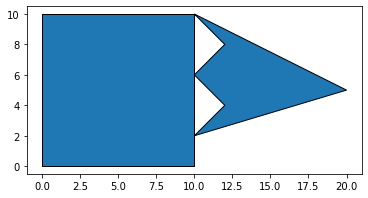

In [2]:
p1 = box(0,0,10,10)
p2 = Polygon([(10,10), (12,8), (10,6), (12,4), (10,2), (20,5)])

gdf = geopandas.GeoDataFrame(geometry=[p1,p2])
gdf.plot(edgecolor='k')

In [3]:
geoplanar.gaps(gdf)

/home/serge/Documents/g/geoplanar/geoplanar/geoplanar/gap.py:48: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  _gaps = dbu.explode()


,level_0,level_1,geometry
2,0,2,"POLYGON ((10.00000 10.00000, 12.00000 8.00000,..."
3,0,3,"POLYGON ((10.00000 6.00000, 12.00000 4.00000, ..."


In [4]:
g = geoplanar.gaps(gdf)

/home/serge/Documents/g/geoplanar/geoplanar/geoplanar/gap.py:48: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  _gaps = dbu.explode()


In [5]:
g.area.values

array([4., 4.])

In [6]:
gdf1 = geoplanar.fill_gaps(gdf)

/home/serge/Documents/g/geoplanar/geoplanar/geoplanar/gap.py:48: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  _gaps = dbu.explode()


<AxesSubplot:>

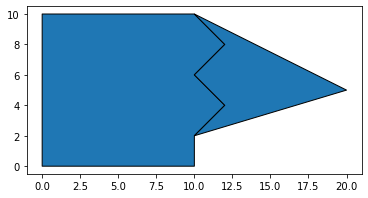

In [7]:
gdf1.plot(edgecolor='k')

In [8]:
gdf1.area

0    108.0
1     32.0
dtype: float64

In [9]:
gdf.area

0    100.0
1     32.0
dtype: float64

In [10]:
geoplanar.gaps(gdf1)

/home/serge/Documents/g/geoplanar/geoplanar/geoplanar/gap.py:48: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  _gaps = dbu.explode()


,level_0,level_1,geometry


The default is to merge the gap with the largest neighboring feature. 

To merge the gap with the smallest neighboring feature set `Largest=False':

/home/serge/Documents/g/geoplanar/geoplanar/geoplanar/gap.py:48: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  _gaps = dbu.explode()


<AxesSubplot:>

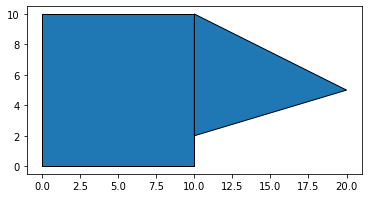

In [11]:
geoplanar.fill_gaps(gdf, largest=False).plot(edgecolor='k')

In [12]:
geoplanar.fill_gaps(gdf, largest=False).area

/home/serge/Documents/g/geoplanar/geoplanar/geoplanar/gap.py:48: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  _gaps = dbu.explode()


0    100.0
1     40.0
dtype: float64

## Checking edge case

<AxesSubplot:>

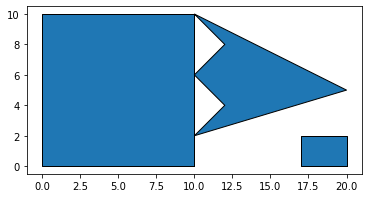

In [13]:
p1 = box(0,0,10,10)
p2 = Polygon([(10,10), (12,8), (10,6), (12,4), (10,2), (20,5)])
p3 = box(17,0,20,2)

gdf = geopandas.GeoDataFrame(geometry=[p1,p2,p3])
gdf.plot(edgecolor='k')

In [14]:
g = geoplanar.gaps(gdf)

/home/serge/Documents/g/geoplanar/geoplanar/geoplanar/gap.py:48: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  _gaps = dbu.explode()


<AxesSubplot:>

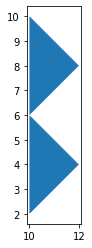

In [15]:
g.plot()

/home/serge/Documents/g/geoplanar/geoplanar/geoplanar/gap.py:48: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  _gaps = dbu.explode()


<AxesSubplot:>

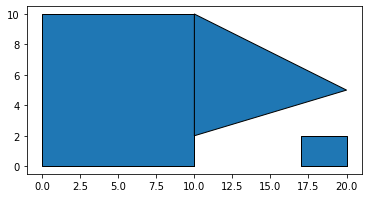

In [16]:
geoplanar.fill_gaps(gdf, largest=False).plot(edgecolor='k')

/home/serge/Documents/g/geoplanar/geoplanar/geoplanar/gap.py:48: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  _gaps = dbu.explode()


<AxesSubplot:>

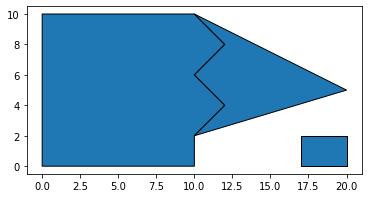

In [17]:
geoplanar.fill_gaps(gdf, largest=True).plot(edgecolor='k')

<AxesSubplot:>

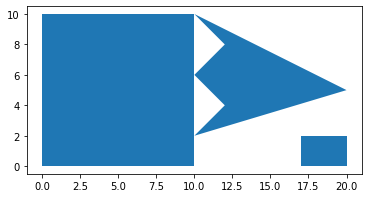

In [18]:
gdf.plot()

## Gap with an inlet (non-gap)

<AxesSubplot:>

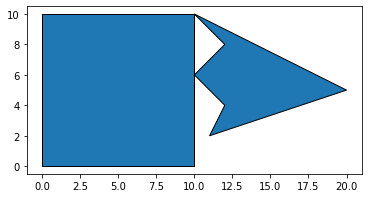

In [19]:
p1 = box(0,0,10,10)
p2 = Polygon([(10,10), (12,8), (10,6), (12,4), (11,2), (20,5)])

# a true gap with a inlet
gdf = geopandas.GeoDataFrame(geometry=[p1,p2])
gdf.plot(edgecolor='k')

In [20]:
geoplanar.gaps(gdf)

/home/serge/Documents/g/geoplanar/geoplanar/geoplanar/gap.py:48: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  _gaps = dbu.explode()


,level_0,level_1,geometry
2,0,2,"POLYGON ((10.00000 10.00000, 12.00000 8.00000,..."


/home/serge/Documents/g/geoplanar/geoplanar/geoplanar/gap.py:48: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  _gaps = dbu.explode()


<AxesSubplot:>

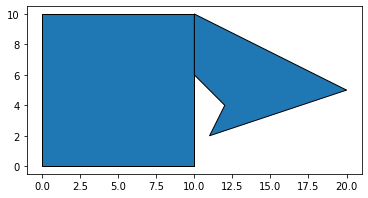

In [21]:
geoplanar.fill_gaps(gdf, largest=False).plot(edgecolor='k')

## Selective Correction

<AxesSubplot:>

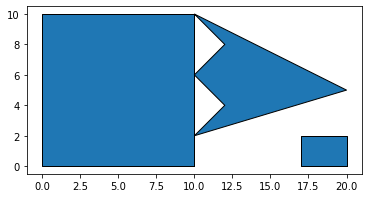

In [22]:
p1 = box(0,0,10,10)
p2 = Polygon([(10,10), (12,8), (10,6), (12,4), (10,2), (20,5)])
p3 = box(17,0,20,2)

gdf = geopandas.GeoDataFrame(geometry=[p1,p2,p3])
gdf.plot(edgecolor='k')

In [23]:
gaps = geoplanar.gaps(gdf)

/home/serge/Documents/g/geoplanar/geoplanar/geoplanar/gap.py:48: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  _gaps = dbu.explode()


<AxesSubplot:>

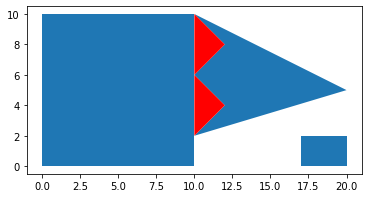

In [24]:
base = gdf.plot()
gaps.plot(color='red', ax=base)

In [25]:
gaps

,level_0,level_1,geometry
2,0,2,"POLYGON ((10.00000 10.00000, 12.00000 8.00000,..."
3,0,3,"POLYGON ((10.00000 6.00000, 12.00000 4.00000, ..."


In [26]:
g2 = gaps.loc[[2]]

In [27]:
g2

,level_0,level_1,geometry
2,0,2,"POLYGON ((10.00000 10.00000, 12.00000 8.00000,..."


In [28]:
filled = geoplanar.fill_gaps(gdf,g2)

<AxesSubplot:>

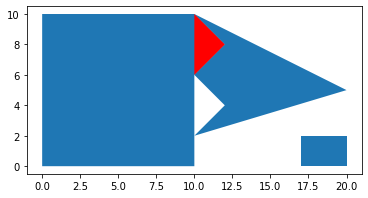

In [29]:
base = filled.plot()
g2.plot(color='red', ax=base)

In [30]:
filled.area

0    104.0
1     32.0
2      6.0
dtype: float64

In [31]:
filled.shape

(3, 1)

In [34]:
(filled.area==[104, 32,6]).all()

True